In [1]:
ls /media/andre

11D9-5C57/  5161-4A93/  9B57-8640/  maternal/


In [2]:
from pathlib import Path 

# On my system, this is where the storage devices are mounted
MOUNT_POINT = Path("/media/andre")

# The names of drives the data exists
DRIVES = [
    '11D9-5C57',
    '5161-4A93',
    '9B57-8640'
]

# Where we want to store the videos
OUTPUT_DRIVE = MOUNT_POINT / 'maternal'

In [3]:
%%time

total_size = 0
for drive in DRIVES:
    # glob is a useful tool for searching folders, here we tell it to find every file
    files = (MOUNT_POINT / drive).glob('**/*')
    
    # Only keep the files (discard directories)
    files = list(filter(lambda x: x.is_file(), files)) 
    
    # Get the size of each file
    sizes = list(map(lambda x: x.stat().st_size, files)) 
    size = sum(sizes)
    total_size += size
    
    # print the size in gigabytes
    print(f"Drive {drive} is {size / 1e9:.2f}GB")
    
# print the total size
print(f"Total: {total_size / 1e9:.2f}GB")

Drive 11D9-5C57 is 997.12GB
Drive 5161-4A93 is 491.29GB
Drive 9B57-8640 is 705.03GB
Total: 2193.44GB
CPU times: user 41.3 ms, sys: 31.9 ms, total: 73.2 ms
Wall time: 73.2 ms


In [4]:
total_size = 0

# Use a set instead of a list to ignore duplicates
extensions = set()
for drive in DRIVES:
    files = (MOUNT_POINT / drive).glob('**/*')
    files = list(filter(lambda x: x.is_file(), files))
    
    # Get the extensions
    for filepath in files:
        fileparts = filepath.parts[-1].split('.')
        
        # Some files don't have extensions, ignore those
        if len(fileparts) > 1:
            extensions.add(fileparts[-1])

print("Extensions: ", list(extensions))

Extensions:  ['loc', 'indexIds', 'indexGroups', '_KO16 day 20', 'shadowIndexGroups', 'wbverify', '_KO14 day 20', 'indexCompactDirectory', 'directoryStoreFile', 'created', 'SnowLeopard', '_KO10 DAY 15', 'updates', 'indexArrays', 'shadowIndexPositionTable', 'shadowIndexCompactDirectory', 'txt', 'indexPositionTable', '_KO15 Day 20', 'shadowIndexDirectory', '9', 'mp4', '_WT3 day 15', '_ko9 day 20', '1', 'bin', 'zip', 'shadowIndexTermIds', 'indexPostings', 'indexDirectory', 'shadow', '2', '_KO16 day 15', 'indexBigDates', 'MPG', '_KO112 D15', '159', '_KO152 Day20', 'db', 'ini', 'indexHead', '_KO12 day 15', 'indexPositions', 'indexTermIds', 'dat', 'donotpresent', '_KO15 day 15', 'shadowIndexHead', 'wbcat', '_KO152 DAY 15', 'plist', 'indexUpdates', 'modified', 'Cab', 'shadowIndexArrays', '10', 'Trashes', 'state', '_KO10 DAY 20']


In [5]:
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    
    print(f"Number of videos in {drive}: {len(videos)}")

Number of videos in 11D9-5C57: 1102
Number of videos in 5161-4A93: 528
Number of videos in 9B57-8640: 673


In [6]:
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    videos = list(map(str, videos)) # makes things a bit prettier
    print(videos)

['/media/andre/11D9-5C57/ch04_20141026223910.mp4', '/media/andre/11D9-5C57/ch04_20141027002615.mp4', '/media/andre/11D9-5C57/._ch02_20141004031546.mp4', '/media/andre/11D9-5C57/ch04_20141027021320.mp4', '/media/andre/11D9-5C57/ch04_20141027040025.mp4', '/media/andre/11D9-5C57/ch04_20141027054731.mp4', '/media/andre/11D9-5C57/ch04_20141027073438.mp4', '/media/andre/11D9-5C57/ch07_20141029182333.mp4', '/media/andre/11D9-5C57/ch07_20141029185404.mp4', '/media/andre/11D9-5C57/ch07_20141029204109.mp4', '/media/andre/11D9-5C57/ch07_20141029222816.mp4', '/media/andre/11D9-5C57/ch07_20141030001521.mp4', '/media/andre/11D9-5C57/ch07_20141030020226.mp4', '/media/andre/11D9-5C57/ch07_20141030034933.mp4', '/media/andre/11D9-5C57/ch07_20141030053638.mp4', '/media/andre/11D9-5C57/ch07_20141030072343.mp4', '/media/andre/11D9-5C57/ch07_20141030091049.mp4', '/media/andre/11D9-5C57/ch07_20141030105756.mp4', '/media/andre/11D9-5C57/ch07_20141030124501.mp4', '/media/andre/11D9-5C57/ch07_20141030143208.mp4

In [7]:
def is_visible(filepath):
    for part in filepath.parts:
        if part.startswith('.'):
            return False
        
    return True

def is_not_recycled(filepath):
    for part in filepath.parts:
        if part.startswith('$RECYCLE'):
            return False
        
    return True
    
all_videos = []
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    
    all_videos_len = len(videos)
    videos = list(filter(is_visible, videos))
    videos = list(filter(is_not_recycled, videos))
    after_filtering_len = len(videos)
    all_videos += videos
    
    print(f"Length of videos before filtering: {all_videos_len:4}, after: {after_filtering_len}")

Length of videos before filtering: 1102, after: 924
Length of videos before filtering:  528, after: 439
Length of videos before filtering:  673, after: 553


In [8]:
pip install -q treelib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import treelib
from tqdm import tqdm

tree = treelib.Tree()
tree.create_node('/', '/')
for video in tqdm(all_videos):
    video = video.relative_to(MOUNT_POINT)
    parts = video.parts[:-1] # don't include filename
    for i in range(1,len(parts)+1):
        uid = '/'.join(parts[:i])
        name = parts[i-1]
        
        if tree.contains(uid):
            continue 
        
        # include parent
        if i > 1:
            parent_uid = '/'.join(parts[:i-1])
            tree.create_node(name, uid, parent=parent_uid)
        else:
            tree.create_node(name, uid, parent='/')
            
tree.show()

  0%|          | 0/1916 [00:00<?, ?it/s]

100%|██████████| 1916/1916 [00:00<00:00, 234321.39it/s]

/
├── 11D9-5C57
│   ├── Day10s
│   │   └── ko10 day 10
│   ├── KO10 DAY 15
│   ├── KO10 DAY 20
│   ├── KO112 D15
│   ├── KO12 day 10
│   ├── KO12 day 15
│   ├── KO14 day 20
│   ├── KO15 Day 20
│   ├── KO15 day 15
│   ├── KO152 DAY 10
│   ├── KO152 DAY 15
│   ├── KO152 Day20
│   ├── KO16 day 15
│   ├── KO16 day 20
│   ├── WT3 DAY 20
│   ├── WT3 day 10
│   ├── WT3 day 15
│   ├── WT6 DAY 20
│   ├── WT72 D15
│   ├── WT72 DAY 10
│   ├── WT72 DAY 15
│   ├── WT72 DAY 20
│   │   └── WT12 D15
│   │       └── WT12 day 15
│   ├── WT8 DAY 15
│   ├── WT8 day 20
│   ├── WT82 D10
│   ├── WT82 D20
│   ├── WT82 DAY 15
│   ├── WT82 DAY 20
│   ├── ko9 day 20
│   └── wt6 day 15
├── 5161-4A93
│   ├── Day10s
│   ├── KO112 D15
│   ├── KO15 Day 20
│   ├── KO15 day 15
│   ├── KO9 Day 20
│   ├── WT72 D15
│   ├── WT72 Day 20
│   │   └── WT12 D15
│   │       └── WT12 day 15
│   ├── WT8 Day 15
│   └── WT82 D20
└── 9B57-8640
    ├── AVIDEOS
    │   └── stef videos
    ├── KO10 day 10
    ├── KO11 day 20
    ├── KO1

In [10]:
import pandas as pd
import cv2
from tqdm import tqdm

metadata = []
for video in tqdm(all_videos):
    cap = cv2.VideoCapture(str(video))
    _metadata = {
        'file': video,
        'filetype': video.parts[-1].split('.')[-1],
        'frames': int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'fps': float(cap.get(cv2.CAP_PROP_FPS)),
        'width': int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        'height': int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
        'size': video.stat().st_size
    }
    metadata.append(_metadata)
    
metadata_df = pd.DataFrame(metadata)
metadata_df

  0%|          | 0/1916 [00:00<?, ?it/s]

  1%|          | 14/1916 [00:00<00:13, 135.95it/s]

  1%|▏         | 28/1916 [00:00<00:14, 128.67it/s]

  2%|▏         | 41/1916 [00:00<00:17, 107.51it/s]

  3%|▎         | 53/1916 [00:00<00:17, 106.41it/s]

  3%|▎         | 64/1916 [00:00<00:18, 99.11it/s] 

  4%|▍         | 75/1916 [00:00<00:18, 98.30it/s]

  4%|▍         | 85/1916 [00:00<00:18, 98.39it/s]

  5%|▍         | 95/1916 [00:00<00:19, 93.56it/s]

  5%|▌         | 105/1916 [00:01<00:19, 91.20it/s]

  6%|▋         | 120/1916 [00:01<00:16, 105.88it/s]

  7%|▋         | 131/1916 [00:01<00:22, 80.88it/s] 

  7%|▋         | 141/1916 [00:01<00:20, 84.66it/s]

  8%|▊         | 151/1916 [00:01<00:21, 83.01it/s]

  8%|▊         | 160/1916 [00:01<00:21, 81.84it/s]

  9%|▉         | 169/1916 [00:01<00:21, 80.79it/s]

  9%|▉         | 178/1916 [00:01<00:21, 80.50it/s]

 10%|▉         | 187/1916 [00:02<00:21, 80.25it/s]

 10%|█         | 197/1916 [00:02<00:20, 83.36it/s]

 11%|█         | 206/1916 [00:02<00:21, 81.07it/s]

 11%|█▏        | 216/1916 [00:02<00:20, 83.85it/s]

 12%|█▏        | 227/1916 [00:02<00:18, 90.36it/s]

 12%|█▏        | 238/1916 [00:02<00:17, 95.33it/s]

 13%|█▎        | 249/1916 [00:02<00:17, 97.93it/s]

 14%|█▎        | 262/1916 [00:02<00:15, 104.38it/s]

 14%|█▍        | 275/1916 [00:02<00:14, 110.24it/s]

 15%|█▌        | 291/1916 [00:03<00:13, 123.14it/s]

 16%|█▌        | 304/1916 [00:03<00:13, 121.51it/s]

 17%|█▋        | 317/1916 [00:03<00:13, 122.30it/s]

 17%|█▋        | 332/1916 [00:03<00:12, 129.50it/s]

 18%|█▊        | 348/1916 [00:03<00:11, 137.23it/s]

 19%|█▉        | 362/1916 [00:03<00:11, 136.67it/s]

 20%|█▉        | 377/1916 [00:03<00:10, 140.41it/s]

 20%|██        | 392/1916 [00:03<00:10, 141.11it/s]

 21%|██        | 407/1916 [00:03<00:12, 123.31it/s]

 22%|██▏       | 420/1916 [00:04<00:13, 114.67it/s]

 23%|██▎       | 432/1916 [00:04<00:13, 108.72it/s]

 23%|██▎       | 444/1916 [00:04<00:15, 97.02it/s] 

 24%|██▎       | 455/1916 [00:04<00:14, 99.32it/s]

 24%|██▍       | 466/1916 [00:04<00:21, 67.17it/s]

 25%|██▍       | 475/1916 [00:04<00:20, 69.52it/s]

 25%|██▌       | 485/1916 [00:04<00:19, 74.51it/s]

 26%|██▌       | 494/1916 [00:05<00:18, 77.30it/s]

 26%|██▋       | 504/1916 [00:05<00:17, 81.65it/s]

 27%|██▋       | 514/1916 [00:05<00:16, 84.38it/s]

 27%|██▋       | 523/1916 [00:05<00:16, 82.72it/s]

 28%|██▊       | 532/1916 [00:05<00:16, 84.09it/s]

 28%|██▊       | 542/1916 [00:05<00:15, 87.61it/s]

 29%|██▉       | 552/1916 [00:05<00:15, 89.18it/s]

 29%|██▉       | 563/1916 [00:05<00:14, 92.87it/s]

 30%|██▉       | 573/1916 [00:05<00:14, 92.69it/s]

 30%|███       | 583/1916 [00:06<00:14, 92.30it/s]

 31%|███       | 593/1916 [00:06<00:14, 89.40it/s]

 31%|███▏      | 602/1916 [00:06<00:14, 87.67it/s]

 32%|███▏      | 613/1916 [00:06<00:14, 92.40it/s]

 33%|███▎      | 623/1916 [00:06<00:14, 91.40it/s]

 33%|███▎      | 633/1916 [00:06<00:14, 89.82it/s]

 34%|███▎      | 643/1916 [00:06<00:14, 88.52it/s]

 34%|███▍      | 653/1916 [00:06<00:13, 90.65it/s]

 35%|███▍      | 663/1916 [00:06<00:14, 87.86it/s]

 35%|███▌      | 675/1916 [00:07<00:12, 96.06it/s]

 36%|███▌      | 685/1916 [00:07<00:12, 96.97it/s]

 36%|███▋      | 695/1916 [00:07<00:12, 94.39it/s]

 37%|███▋      | 705/1916 [00:07<00:13, 90.97it/s]

 37%|███▋      | 715/1916 [00:07<00:13, 89.51it/s]

 38%|███▊      | 725/1916 [00:07<00:13, 89.53it/s]

 38%|███▊      | 735/1916 [00:07<00:13, 89.84it/s]

 39%|███▉      | 745/1916 [00:07<00:12, 90.48it/s]

 39%|███▉      | 755/1916 [00:07<00:13, 88.10it/s]

 40%|███▉      | 764/1916 [00:08<00:13, 88.14it/s]

 40%|████      | 774/1916 [00:08<00:12, 90.46it/s]

 41%|████      | 784/1916 [00:08<00:12, 92.39it/s]

 41%|████▏     | 794/1916 [00:08<00:12, 91.29it/s]

 42%|████▏     | 804/1916 [00:08<00:12, 91.24it/s]

 43%|████▎     | 815/1916 [00:08<00:11, 95.33it/s]

 43%|████▎     | 825/1916 [00:08<00:11, 91.72it/s]

 44%|████▎     | 835/1916 [00:08<00:11, 91.49it/s]

 44%|████▍     | 845/1916 [00:08<00:11, 89.48it/s]

 45%|████▍     | 855/1916 [00:09<00:11, 89.90it/s]

 45%|████▌     | 865/1916 [00:09<00:11, 90.56it/s]

 46%|████▌     | 875/1916 [00:09<00:11, 90.84it/s]

 46%|████▌     | 885/1916 [00:09<00:11, 88.60it/s]

 47%|████▋     | 894/1916 [00:09<00:12, 85.14it/s]

 47%|████▋     | 905/1916 [00:09<00:11, 88.58it/s]

 48%|████▊     | 915/1916 [00:09<00:11, 90.10it/s]

 48%|████▊     | 925/1916 [00:09<00:11, 87.54it/s]

 49%|████▉     | 938/1916 [00:09<00:10, 96.28it/s]

 49%|████▉     | 948/1916 [00:10<00:10, 96.44it/s]

 50%|█████     | 959/1916 [00:10<00:09, 98.22it/s]

 51%|█████     | 969/1916 [00:10<00:10, 91.70it/s]

 51%|█████     | 979/1916 [00:10<00:10, 89.73it/s]

 52%|█████▏    | 989/1916 [00:10<00:10, 91.70it/s]

 52%|█████▏    | 1004/1916 [00:10<00:08, 106.53it/s]

 53%|█████▎    | 1020/1916 [00:10<00:07, 120.80it/s]

 54%|█████▍    | 1035/1916 [00:10<00:06, 127.59it/s]

 55%|█████▍    | 1050/1916 [00:10<00:06, 133.31it/s]

 56%|█████▌    | 1064/1916 [00:11<00:06, 134.15it/s]

 56%|█████▋    | 1078/1916 [00:11<00:06, 134.94it/s]

 57%|█████▋    | 1092/1916 [00:11<00:06, 133.58it/s]

 58%|█████▊    | 1106/1916 [00:11<00:06, 134.78it/s]

 58%|█████▊    | 1120/1916 [00:11<00:06, 130.49it/s]

 59%|█████▉    | 1135/1916 [00:11<00:05, 135.13it/s]

 60%|█████▉    | 1149/1916 [00:11<00:07, 108.39it/s]

 61%|██████    | 1162/1916 [00:11<00:06, 111.45it/s]

 61%|██████▏   | 1175/1916 [00:11<00:06, 113.41it/s]

 62%|██████▏   | 1191/1916 [00:12<00:05, 123.12it/s]

 63%|██████▎   | 1206/1916 [00:12<00:05, 127.58it/s]

 64%|██████▎   | 1220/1916 [00:12<00:05, 128.24it/s]

 64%|██████▍   | 1235/1916 [00:12<00:05, 133.08it/s]

 65%|██████▌   | 1249/1916 [00:12<00:05, 132.69it/s]

 66%|██████▌   | 1263/1916 [00:12<00:04, 132.18it/s]

 67%|██████▋   | 1278/1916 [00:12<00:04, 135.88it/s]

 67%|██████▋   | 1293/1916 [00:12<00:04, 139.23it/s]

 68%|██████▊   | 1307/1916 [00:12<00:04, 134.94it/s]

 69%|██████▉   | 1321/1916 [00:13<00:04, 119.14it/s]

 70%|██████▉   | 1334/1916 [00:13<00:05, 111.34it/s]

 70%|███████   | 1346/1916 [00:13<00:05, 103.83it/s]

 71%|███████   | 1357/1916 [00:13<00:05, 99.30it/s] 

 71%|███████▏  | 1368/1916 [00:13<00:05, 98.78it/s]

 72%|███████▏  | 1380/1916 [00:13<00:05, 103.27it/s]

 73%|███████▎  | 1393/1916 [00:13<00:04, 108.42it/s]

 73%|███████▎  | 1405/1916 [00:13<00:04, 109.54it/s]

 74%|███████▍  | 1418/1916 [00:13<00:04, 113.28it/s]

 75%|███████▍  | 1430/1916 [00:14<00:04, 113.79it/s]

 75%|███████▌  | 1442/1916 [00:14<00:04, 104.07it/s]

 76%|███████▌  | 1453/1916 [00:14<00:04, 98.54it/s] 

 76%|███████▋  | 1464/1916 [00:14<00:04, 93.95it/s]

 77%|███████▋  | 1474/1916 [00:14<00:04, 92.85it/s]

 77%|███████▋  | 1484/1916 [00:14<00:04, 93.16it/s]

 78%|███████▊  | 1494/1916 [00:14<00:04, 93.22it/s]

 78%|███████▊  | 1504/1916 [00:14<00:04, 94.11it/s]

 79%|███████▉  | 1515/1916 [00:15<00:04, 95.91it/s]

 80%|███████▉  | 1525/1916 [00:15<00:05, 76.39it/s]

 80%|████████  | 1537/1916 [00:15<00:04, 85.42it/s]

 81%|████████  | 1549/1916 [00:15<00:03, 93.42it/s]

 81%|████████▏ | 1560/1916 [00:15<00:03, 94.89it/s]

 82%|████████▏ | 1570/1916 [00:15<00:03, 89.61it/s]

 82%|████████▏ | 1580/1916 [00:15<00:03, 90.81it/s]

 83%|████████▎ | 1590/1916 [00:15<00:03, 92.60it/s]

 84%|████████▎ | 1600/1916 [00:16<00:03, 88.74it/s]

 84%|████████▍ | 1610/1916 [00:16<00:03, 90.27it/s]

 85%|████████▍ | 1620/1916 [00:16<00:03, 90.31it/s]

 85%|████████▌ | 1636/1916 [00:16<00:02, 106.53it/s]

 86%|████████▌ | 1647/1916 [00:16<00:02, 106.11it/s]

 87%|████████▋ | 1659/1916 [00:16<00:02, 109.20it/s]

 87%|████████▋ | 1671/1916 [00:16<00:02, 109.90it/s]

 88%|████████▊ | 1683/1916 [00:16<00:02, 100.58it/s]

 88%|████████▊ | 1694/1916 [00:16<00:02, 95.81it/s] 

 89%|████████▉ | 1706/1916 [00:17<00:02, 99.77it/s]

 90%|████████▉ | 1718/1916 [00:17<00:01, 103.88it/s]

 90%|█████████ | 1729/1916 [00:17<00:01, 105.20it/s]

 91%|█████████ | 1740/1916 [00:17<00:01, 97.30it/s] 

 91%|█████████▏| 1750/1916 [00:17<00:01, 96.50it/s]

 92%|█████████▏| 1762/1916 [00:17<00:01, 100.92it/s]

 93%|█████████▎| 1773/1916 [00:17<00:01, 90.40it/s] 

 93%|█████████▎| 1783/1916 [00:17<00:01, 90.38it/s]

 94%|█████████▎| 1794/1916 [00:17<00:01, 93.67it/s]

 94%|█████████▍| 1805/1916 [00:18<00:01, 95.27it/s]

 95%|█████████▍| 1815/1916 [00:18<00:01, 90.18it/s]

 95%|█████████▌| 1825/1916 [00:18<00:01, 86.78it/s]

 96%|█████████▌| 1836/1916 [00:18<00:00, 90.90it/s]

 96%|█████████▋| 1847/1916 [00:18<00:00, 94.17it/s]

 97%|█████████▋| 1857/1916 [00:18<00:00, 94.84it/s]

 97%|█████████▋| 1867/1916 [00:18<00:00, 93.88it/s]

 98%|█████████▊| 1877/1916 [00:18<00:00, 93.65it/s]

 98%|█████████▊| 1887/1916 [00:18<00:00, 93.57it/s]

100%|█████████▉| 1912/1916 [00:19<00:00, 136.18it/s]

100%|██████████| 1916/1916 [00:19<00:00, 100.37it/s]

,file,filetype,frames,fps,width,height,size
0,/media/andre/11D9-5C57/ch04_20141026223910.mp4,mp4,192676,30.00000,704,480,1066007308
1,/media/andre/11D9-5C57/ch04_20141027002615.mp4,mp4,192706,30.00000,704,480,1066179432
2,/media/andre/11D9-5C57/ch04_20141027021320.mp4,mp4,192706,30.00000,704,480,1066176324
3,/media/andre/11D9-5C57/ch04_20141027040025.mp4,mp4,192708,30.00000,704,480,1066180924
4,/media/andre/11D9-5C57/ch04_20141027054731.mp4,mp4,192736,30.00000,704,480,1066337616
...,...,...,...,...,...,...,...
1911,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94226,29.97003,720,480,2117322752
1912,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94331,29.97003,720,480,2119616512
1913,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94437,29.97003,720,480,2122072064
1914,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94362,29.97003,720,480,2120353792


In [11]:
(metadata_df.frames / metadata_df.fps).sum()

-307445721479635.5

In [12]:
metadata_df.describe()

,frames,fps,width,height,size
count,1.916000e+03,1916.000000,1916.000000,1916.0,1.916000e+03
mean,-4.813868e+12,29.999531,704.250522,480.0,1.026649e+09
std,1.215918e+14,0.003722,1.986869,0.0,2.238644e+08
min,-3.074457e+15,29.970030,704.000000,480.0,5.850560e+05
25%,1.927070e+05,30.000000,704.000000,480.0,1.065998e+09
50%,1.927090e+05,30.000000,704.000000,480.0,1.066125e+09
75%,1.927380e+05,30.000000,704.000000,480.0,1.066247e+09
max,2.101409e+06,30.000000,720.000000,480.0,2.123639e+09


In [13]:
metadata_df.loc[metadata_df.frames < 0]

,file,filetype,frames,fps,width,height,size
122,/media/andre/11D9-5C57/KO12 day 15/ch05_201503...,mp4,-3074457345618259,30.0,704,480,1066281808
1143,/media/andre/5161-4A93/ch05_20150308203728 - C...,mp4,-3074457345618259,30.0,704,480,1066056300
1519,/media/andre/9B57-8640/WT6/WT6 day 15 (9).mp4,mp4,-3074457345618259,30.0,704,480,1065810640


In [14]:
outlier_rows = metadata_df.frames < 0
metadata_df.loc[outlier_rows, 'frames'] = None
metadata_df.loc[outlier_rows]

,file,filetype,frames,fps,width,height,size
122,/media/andre/11D9-5C57/KO12 day 15/ch05_201503...,mp4,NaN,30.0,704,480,1066281808
1143,/media/andre/5161-4A93/ch05_20150308203728 - C...,mp4,NaN,30.0,704,480,1066056300
1519,/media/andre/9B57-8640/WT6/WT6 day 15 (9).mp4,mp4,NaN,30.0,704,480,1065810640


In [15]:
(metadata_df.frames / metadata_df.fps).sum()

13082190.523133334

In [16]:
total_seconds = (metadata_df.frames / metadata_df.fps).sum()
total_days = total_seconds / 60 / 60 / 24 # 60s->1m, 60m->1h, 24h->1d
print(f"Total days of videos: {total_days:.1f}")

Total days of videos: 151.4


In [17]:
metadata_df.describe()

,frames,fps,width,height,size
count,1.913000e+03,1916.000000,1916.000000,1916.0,1.916000e+03
mean,2.051559e+05,29.999531,704.250522,480.0,1.026649e+09
std,1.025081e+05,0.003722,1.986869,0.0,2.238644e+08
min,1.620000e+02,29.970030,704.000000,480.0,5.850560e+05
25%,1.927070e+05,30.000000,704.000000,480.0,1.065998e+09
50%,1.927090e+05,30.000000,704.000000,480.0,1.066125e+09
75%,1.927380e+05,30.000000,704.000000,480.0,1.066247e+09
max,2.101409e+06,30.000000,720.000000,480.0,2.123639e+09


In [18]:
metadata_df.width.unique()

array([704, 720])

In [19]:
metadata_df.loc[metadata_df.width==704].describe()

,frames,fps,width,height,size
count,1.883000e+03,1886.0,1886.0,1886.0,1.886000e+03
mean,2.071501e+05,30.0,704.0,480.0,1.014394e+09
std,1.020346e+05,0.0,0.0,0.0,1.896017e+08
min,1.620000e+02,30.0,704.0,480.0,5.850560e+05
25%,1.927070e+05,30.0,704.0,480.0,1.065996e+09
50%,1.927090e+05,30.0,704.0,480.0,1.066125e+09
75%,1.927380e+05,30.0,704.0,480.0,1.066235e+09
max,2.101409e+06,30.0,704.0,480.0,1.066355e+09


In [20]:
metadata_df.loc[metadata_df.width==704].sample(3)

,file,filetype,frames,fps,width,height,size
1621,/media/andre/9B57-8640/KO14 day 20/KO14 day 20...,mp4,318255.0,30.0,704,480,1065852860
1885,/media/andre/9B57-8640/KO11 day 20/KO11 day 20...,mp4,192710.0,30.0,704,480,1066110760
1254,/media/andre/5161-4A93/Day10s/wt12 day 10 (3).mp4,mp4,192736.0,30.0,704,480,1066303140


In [21]:
metadata_df.loc[metadata_df.width==720].describe()

,frames,fps,width,height,size
count,30.000000,3.000000e+01,30.0,30.0,3.000000e+01
mean,79989.800000,2.997003e+01,720.0,480.0,1.797113e+09
std,26287.615716,7.226896e-15,0.0,0.0,5.906035e+08
min,3221.000000,2.997003e+01,720.0,480.0,7.218176e+07
25%,80380.250000,2.997003e+01,720.0,480.0,1.805404e+09
50%,94297.500000,2.997003e+01,720.0,480.0,2.118510e+09
75%,94458.000000,2.997003e+01,720.0,480.0,2.121956e+09
max,94561.000000,2.997003e+01,720.0,480.0,2.123639e+09


In [22]:
metadata_df.loc[metadata_df.width==720].sample(3)

,file,filetype,frames,fps,width,height,size
1889,/media/andre/9B57-8640/AVIDEOS/M2U00174.MPG,MPG,94226.0,29.97003,720,480,2117355520
1905,/media/andre/9B57-8640/AVIDEOS/M2U00190.MPG,MPG,28692.0,29.97003,720,480,644536320
1890,/media/andre/9B57-8640/AVIDEOS/M2U00175.MPG,MPG,39985.0,29.97003,720,480,898533376


In [23]:
print(f"We're not going to reorganize our {len(all_videos)} videos here.")

We're not going to reorganize our 1916 videos here.


In [24]:
import re

with open('transcode.sh', 'w') as fp:
    lines = []
    for video in all_videos:
        relative_path = video.relative_to(MOUNT_POINT)
        output_filepath = OUTPUT_DRIVE / relative_path
        
        # For now lets skip existing filepaths
        if output_filepath.exists():
            continue
        
        cmd = (
            "mkdir -p {output_dir} && " # make a new directory if necessary
            "ffmpeg -y -i {input_file} " # the input file and flags
            "-crf 18 -r 30 -an {output_file}\n" # the output file and flags
        ).format(
            output_dir=re.escape(str(output_filepath.parent)), 
            input_file=re.escape(str(video)), 
            output_file=re.escape(str(output_filepath))
        ) 
        
        lines.append(cmd)
        
    fp.writelines(lines)

In [25]:
! head -n 3 transcode.sh

mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch04_20141027002615\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch04_20141027002615\.mp4
mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch07_20141030053638\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch07_20141030053638\.mp4
mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch07_20141030072343\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch07_20141030072343\.mp4


In [26]:
transcoded_videos = (
    list(OUTPUT_DRIVE.glob('**/*.mp4')) + 
    list(OUTPUT_DRIVE.glob('**/*.MPG'))
)

metadata = []
for transcoded_video in tqdm(transcoded_videos):
    relative_path = transcoded_video.relative_to(OUTPUT_DRIVE)
    original_video = MOUNT_POINT / relative_path
    
    original_cap = cv2.VideoCapture(str(original_video))
    transcoded_cap = cv2.VideoCapture(str(transcoded_video))
    
    _metadata = {
        'original_file': original_video,
        'transcoded_file': transcoded_video,
        'original_frames': int(original_cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'transcoded_frames': int(transcoded_cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'original_filesize': original_video.stat().st_size, 
        'transcoded_filesize': transcoded_video.stat().st_size, 
    }
    metadata.append(_metadata)
    
transcoded_metadata_df = pd.DataFrame(metadata)

# ignore the video currently being transcoded (will show as having 0 frames)
transcoded_metadata_df = transcoded_metadata_df.loc[transcoded_metadata_df.transcoded_frames > 0]

transcoded_metadata_df.head(3)

  0%|          | 0/74 [00:00<?, ?it/s]

  4%|▍         | 3/74 [00:00<00:02, 29.48it/s]

  9%|▉         | 7/74 [00:00<00:01, 34.05it/s]

 15%|█▍        | 11/74 [00:00<00:01, 34.27it/s]

 20%|██        | 15/74 [00:00<00:01, 33.18it/s]

 27%|██▋       | 20/74 [00:00<00:01, 34.70it/s]

 32%|███▏      | 24/74 [00:00<00:01, 32.82it/s]

 38%|███▊      | 28/74 [00:00<00:01, 32.90it/s]

 43%|████▎     | 32/74 [00:00<00:01, 32.59it/s]

 49%|████▊     | 36/74 [00:01<00:01, 31.92it/s]

 54%|█████▍    | 40/74 [00:01<00:01, 31.89it/s]

 59%|█████▉    | 44/74 [00:01<00:00, 32.16it/s]

 65%|██████▍   | 48/74 [00:01<00:00, 31.64it/s]

 70%|███████   | 52/74 [00:01<00:00, 31.42it/s]

 76%|███████▌  | 56/74 [00:01<00:00, 29.50it/s]

 81%|████████  | 60/74 [00:01<00:00, 24.52it/s]

 86%|████████▋ | 64/74 [00:02<00:00, 26.02it/s]

 92%|█████████▏| 68/74 [00:02<00:00, 27.54it/s]

 97%|█████████▋| 72/74 [00:02<00:00, 29.49it/s]

100%|██████████| 74/74 [00:02<00:00, 27.16it/s]

,original_file,transcoded_file,original_frames,transcoded_frames,original_filesize,transcoded_filesize
0,/media/andre/11D9-5C57/ch04_20141026223910.mp4,/media/andre/maternal/11D9-5C57/ch04_201410262...,192676,192676,1066007308,52861588
1,/media/andre/11D9-5C57/ch04_20141027021320.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,192706,192706,1066176324,110945462
2,/media/andre/11D9-5C57/ch04_20141027040025.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,192708,192708,1066180924,116991856


In [27]:
transcoded_metadata_df.describe()

,original_frames,transcoded_frames,original_filesize,transcoded_filesize
count,73.000000,73.000000,7.300000e+01,7.300000e+01
mean,190811.136986,181104.273973,1.001930e+09,2.953418e+08
std,93442.893445,40309.814777,2.229961e+08,1.417571e+08
min,219.000000,219.000000,1.271536e+06,6.381800e+05
25%,192707.000000,192707.000000,1.066084e+09,2.065524e+08
50%,192708.000000,192708.000000,1.066131e+09,2.693158e+08
75%,192737.000000,192736.000000,1.066259e+09,3.936022e+08
max,901309.000000,192740.000000,1.066338e+09,6.313785e+08


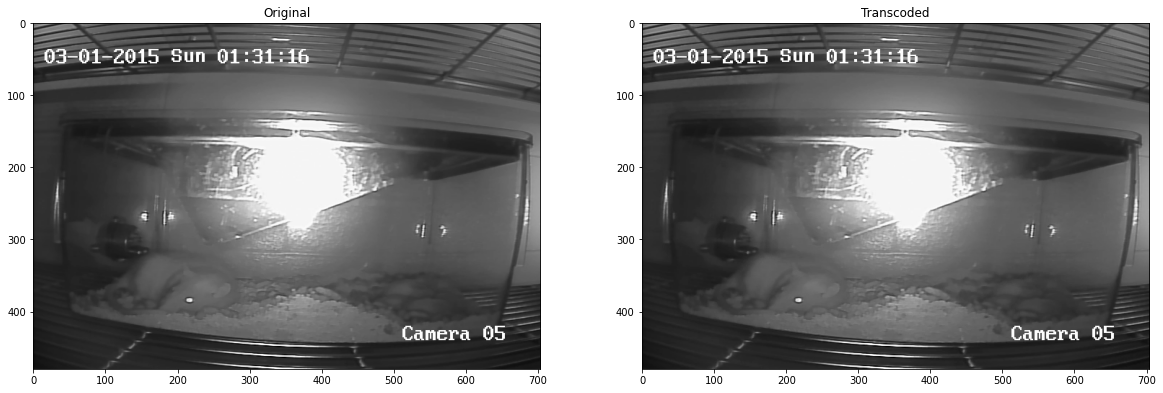

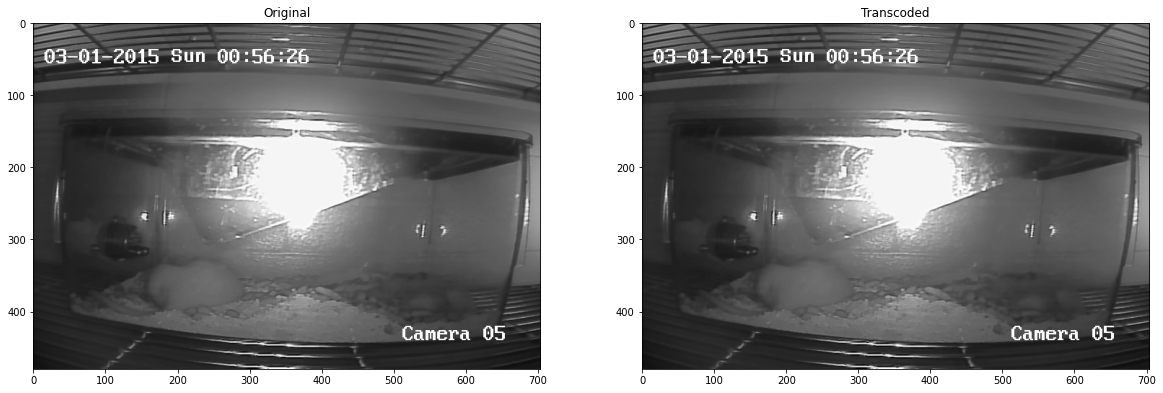

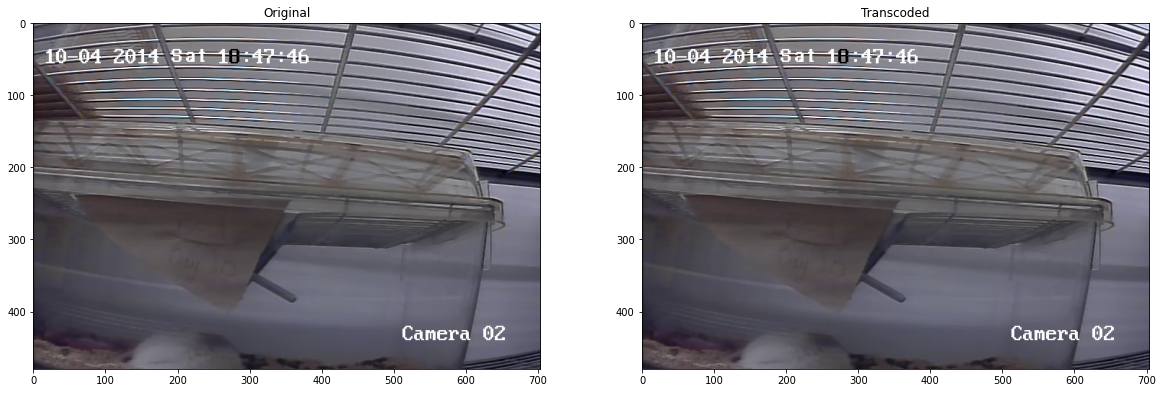

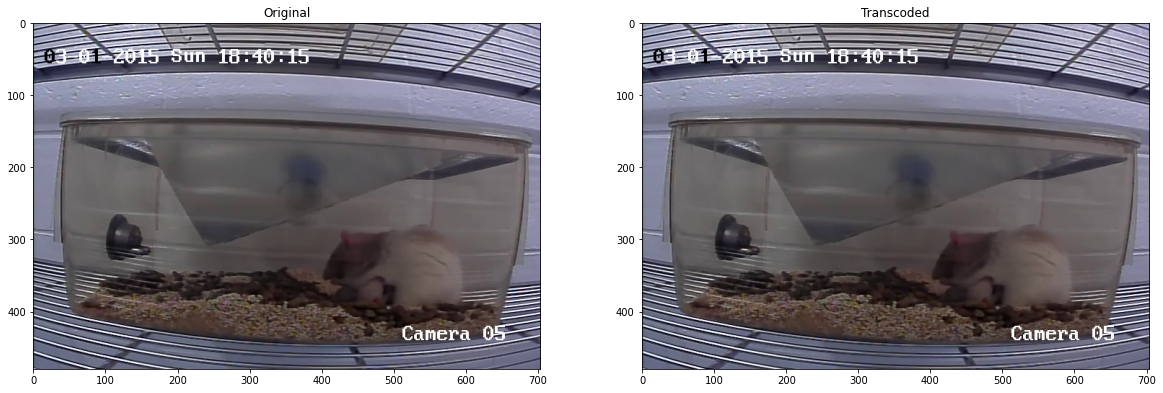

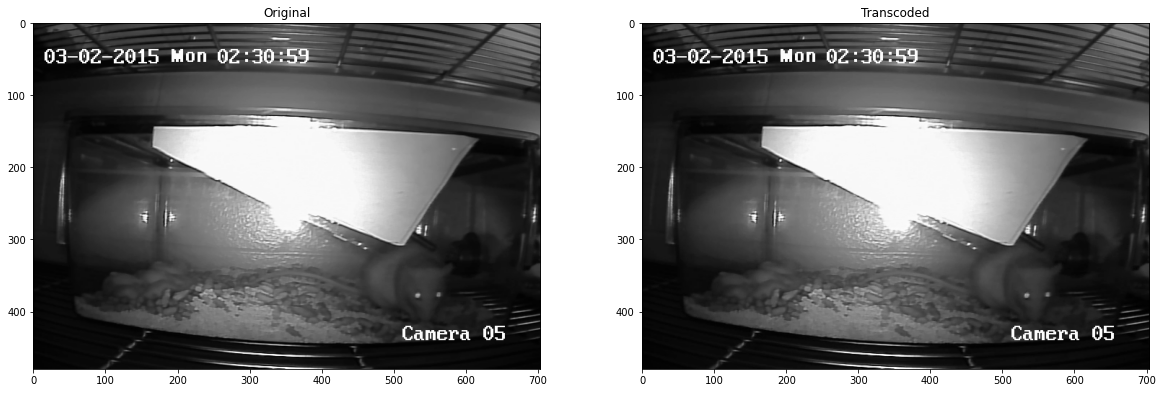

In [28]:
import numpy as np
import matplotlib.pyplot as plt

for idx, row in transcoded_metadata_df.sample(5).iterrows():
    frames = min(row.transcoded_frames, row.original_frames)
    frame_idx = np.random.randint(frames)
    
    original_cap = cv2.VideoCapture(str(row.original_file))
    original_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    transcoded_cap = cv2.VideoCapture(str(row.transcoded_file))
    transcoded_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    plt.figure(figsize=(20, 8))
    gs = plt.GridSpec(1, 2)
    plt.subplot(gs[0])
    plt.title('Original')
    ret, frame = original_cap.read()
    frame = np.flip(frame, axis=2)
    plt.imshow(frame)
    
    plt.subplot(gs[1])
    plt.title('Transcoded')
    ret, frame = transcoded_cap.read()
    frame = np.flip(frame, axis=2)
    plt.imshow(frame)
    
    plt.show()

In [29]:
print(
    (
        "So far we have transcoded {transcoded_count}/{total_count} videos, "
        "compressing them from {original_size:.1f}MB -> {transcoded_size:.1f}MB.\n"
        "This is {percentage:.1f}% of the original size, so we estimate it will "
        "shrink the total dataset from\n{total_original_size:.1f}GB -> {total_transcoded_size:.1f}GB."
    ).format(
        total_count=metadata_df.shape[0],
        transcoded_count=transcoded_metadata_df.shape[0],
        original_size=transcoded_metadata_df.original_filesize.sum()/1e6,
        transcoded_size=transcoded_metadata_df.transcoded_filesize.sum()/1e6,
        percentage=transcoded_metadata_df.transcoded_filesize.sum()/transcoded_metadata_df.original_filesize.sum()*100,
        total_original_size=metadata_df['size'].sum()/1e9,
        total_transcoded_size=metadata_df['size'].sum()/transcoded_metadata_df.original_filesize.sum()/1e9*transcoded_metadata_df.transcoded_filesize.sum(),
    )
)

So far we have transcoded 73/1916 videos, compressing them from 73140.9MB -> 21560.0MB.
This is 29.5% of the original size, so we estimate it will shrink the total dataset from
1967.1GB -> 579.8GB.
